Я скачала датасет с kaggle, чтобы показать, как я работаю с данными без конкретного задания.

В датасете информация о зарплатах, должностях и компаниях, в которых работают указанные специалисты.

На примере датасета я показываю, что умею предобрабатывать данные, строить гистограммы и бар-плоты, создавать таблицы с группировкой и сводные таблицы, описывать графики и табличные значения.

##1. Предобработка и исследование данных.

In [ ]:
#импортировать нужные для работы библиотеки

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#сохранить csv файл в переменную data
data = pd.read_csv('ds_salaries.csv')

In [ ]:
#вывести первые 5 строк таблицы
data.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


**Описание датасета:**

- work_year — год, в который была выплачена зарплата;
- experience_level — уровень работы в указанный год;
- employment_type — тип занятости;
- salary — общая сумма выплаченной зарплаты (брутто);
- salary_currency — в какой валюте выплачивается зарплата (ISO 4217);
- salaryinusd — зарплата в долларах США;
- employee_residence — страна резидента в указанный год и ее ISO 3166 код;
- remote_ratio — общее количество работы, выполненной удаленно;
- company_location — страна работодателя (главного офиса или подрядной организации);
- company_size — медианное количество работников компании в указанный год.

In [ ]:
#узнать размер таблицы
print (f'В таблице {data.shape[0]} строк и {data.shape[1]} колонок.')

В таблице 607 строк и 12 колонок.


In [ ]:
#узнать тип данных в колонках и проверить, есть ли пропущенные данные
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


В таблице нет пропущенных данных (в каждом столбце 607 значений, это число совпадает с количеством строк в датасете).

Тип данных в столбцах совпадает со значениями в столбцах, поэтому изменять их не нужно (числовые данные — integer, текстовые — object).

В таблице есть столбец **unnamed: 0**, в котором нет данных, предоставленных аналитику, он дублирует индекс. Его я удалю.

In [ ]:
#удалить столбец без информации
data = data.drop(columns='Unnamed: 0')

Проверю таблицу на дубликаты. Для этого переведу столбец **job_title** в нижний регистр. Вдруг одна и та же должность записана разным регистром.

In [ ]:
#перевести в нижний регистр
data['job_title'] = data['job_title'].str.lower()

In [ ]:
#проверить таблицу на дубликаты
data.duplicated().sum()

42

В таблице есть 42 строки, которые дублируют уже встречающиеся в датасете.

Если я хочу работать только с уникальными значениями, стоит удалить эти строки. Так и поступлю.

In [ ]:
#удалить дубликаты и перезаписать индекс
data = data.drop_duplicates().reset_index(drop = True)

In [ ]:
#узнать размер таблицы без дублирующих строк и колонок
print (f'В таблице {data.shape[0]} строк и {data.shape[1]} колонок.')

В таблице 565 строк и 11 колонок.


Было 611 строк и 12 колонок, стало 565 строк и 11 колонок.

Проверю уникальные значения в каждом столбце и их количество. Кроме того, в некоторых столбцах есть аббревиатуры, понятные только заказчику, заодно укажу для себя их расшифровку.

In [ ]:
data.work_year.value_counts()

2022    278
2021    215
2020     72
Name: work_year, dtype: int64

В столбце **work_year** представлены только три года — 2022, 2021 и 2020 (в порядке убывания количества записей).

Посмотрю на их распределение в процентном соотношении.

In [ ]:
round(data.groupby('work_year').size()/len(data), 2).sort_values(ascending=False)

work_year
2022    0.49
2021    0.38
2020    0.13
dtype: float64

На 2022 год приходится 49% записей, на 2021 — 38%, а на 2020 всего 13%.

In [ ]:
data.experience_level.value_counts()

SE    243
MI    208
EN     88
EX     26
Name: experience_level, dtype: int64

В столбце **experience_level** представлены четыре уровня по опыту работников.

- EN — Entry-level/Junior;
- MI — Mid-level;
- SE — Senior-level;
- EX — Executive-level/Director.

Больше всего в датасете работников Senior-level, меньше всего — Executive-level.

In [ ]:
round(data.groupby('experience_level').size()/len(data), 2).sort_values(ascending=False)

experience_level
SE    0.43
MI    0.37
EN    0.16
EX    0.05
dtype: float64

В таблице 43% работников Senior-level, 37% работников Mid-level, 16% — Junior-level и 5% Executive-level.

In [ ]:
data.employment_type.value_counts()

FT    546
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64

В столбце **employment_type** представлены четыре типа занятости.

- PT — Part-time, частичная занятость;
- FT — Full-time, полная занятость;
- CT — Contract, договор оказания услуг;
- FL — Freelance.

Больше всего работников с полной занятостью, меньше всего — фрилансеров.

In [ ]:
round(data.groupby('employment_type').size()/len(data), 2).sort_values(ascending=False)

employment_type
FT    0.97
PT    0.02
CT    0.01
FL    0.01
dtype: float64

Работа с полной занятостью у 97% работников, частичная занятость — 2% работников, около 1% у работников на договоре оказания услуг и фрилансе.

In [ ]:
#вывести первые 10 профессий, представленных в таблице (в порядке убывания количества записей)
data.job_title.value_counts().head(10)

data scientist                130
data engineer                 121
data analyst                   82
machine learning engineer      39
research scientist             16
data science manager           12
data architect                 11
big data engineer               8
machine learning scientist      8
principal data scientist        7
Name: job_title, dtype: int64

Список профессий разнообразен, причем названия должностей не стандартизированы. Оставлю как есть. Не буду приводить данные в процентном соотношении, но на графике наглядно покажу, какие должности встречаются чаще других.

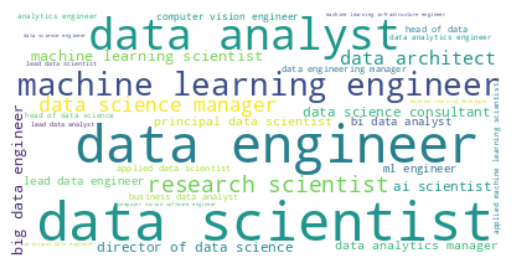

In [ ]:
from wordcloud import WordCloud, ImageColorGenerator
from collections import Counter
job_title_dict = Counter(data.job_title)
wordcloud = WordCloud(max_words = 50, background_color = 'white').generate_from_frequencies(job_title_dict)
plt.imshow(wordcloud, interpolation = 'Bilinear')
plt.axis('off')
plt.figure(1, figsize=(15,15))
plt.show()

Чем крупнее название должности на графике WordCloud, тем чаще она встречается в таблице.

Не буду рассматривать колонку **salary**, потому что представленные в ней числа не дают никакой информации без соседней колонки — **salary_currency**.

Так, одно и то же число, например, 1000, может быть представлено в долларах США и в евро, а значит, должно оцениваться по-разному.

Для сравнения зарплат есть колонка, в которой все числа представлены в соотношении к доллару. Проверю значения в ней (**salary_in_usd**).

array([[<Axes: title={'center': 'salary_in_usd'}>]], dtype=object)

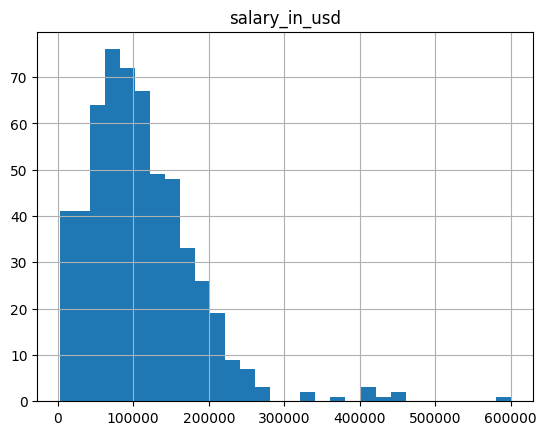

In [ ]:
data.hist('salary_in_usd', bins=30)

Итак, согласно гистограмме распределения, самая рапространенная зарплата в районе 80 тысяч долларов в год.

Встречаются зарплаты выше и ниже этого значения. Достаточное количество приходится на диапазон до 50 тысяч долларов. Скорее всего, с такой зарплатой сталкиваются работники Junior-level. Это предстоит проверить.

Выше 100 тысяч долларов зарплаты тоже есть, но чем зарплата больше, тем меньшее количество работников ее получает. Есть и аномально большие значения. Предположу, что их обеспечил очень маленький процент работников Executive-level.

На гистограмме видно, что она скошена вправо. Это значит, что медианное значение зарплаты (то, которое стоит ровно посередине в ранжированном списке значений) ниже среднего. Так и есть, это связано с длинным хвостом справо, уходящим к отметке в 600 тысяч долларов в год.

Добавлю в таблицу столбец, где будет указан уровень зарплаты в зависимости от диапазона, в который попадает значение из **salary**.

Поделю на основе квартилей. До 1 квартиля — низкая зарплата, от 1 до 2 квартиля — средняя зарплата, от 2 до 3 квартиля — выше среднего, выше 3 квартиля — высокая зарплата.

In [ ]:
#функция для определения уровня зарплаты
def salary_range (salary):
  if salary <= data.salary.quantile(0.25):
    return 'low'
  if salary > data.salary.quantile(0.25) and salary <= data.salary.quantile(0.5):
    return 'average'
  if salary > data.salary.quantile(0.5) and salary <= data.salary.quantile(0.75):
    return 'above average'
  if salary > data.salary.quantile(0.75):
    return 'high'

#создать столбец для уровня зарплаты
data['salary_range'] = data.salary.apply(salary_range)

In [ ]:
#вывести первые 10 стран (по резиденству работников), представленных в таблице (в порядке убывания количества записей)
data.employee_residence.value_counts().head(10)

US    295
GB     43
IN     30
CA     27
DE     24
FR     18
ES     15
GR     12
JP      7
PT      6
Name: employee_residence, dtype: int64

В тройке стран-лидеров (по резидентству работников) США, Великобритания и Индия.

In [ ]:
data.remote_ratio.value_counts()

100    346
0      121
50      98
Name: remote_ratio, dtype: int64

**Доля работы, выполненной удаленно:**

- 100 — полностью удаленная работа;
- 0 — нет удаленной работы (или меньше 20%);
- 50 — частично удаленная работа.

Больше всего в таблице работников на удаленке.

In [ ]:
#вывести первые 10 cтран по резидентству компаний, представленных в таблице (в порядке убывания количества записей)
data.company_location.value_counts().head(10)

US    318
GB     46
CA     28
DE     27
IN     24
FR     15
ES     14
GR     10
JP      6
NL      4
Name: company_location, dtype: int64

В тройке стран-лидеров (по резидентству компаний) США, Великобритания и Канада.

In [ ]:
data.company_size.value_counts()

M    290
L    193
S     82
Name: company_size, dtype: int64

**Размер компаний:**

- S — small;
- M — medium;
- L — large.

In [ ]:
round(data.groupby('company_size').size()/len(data), 2).sort_values(ascending=False)

company_size
M    0.51
L    0.34
S    0.15
dtype: float64

Средних по размеру компаний 51%, больших — 34%, маленьких — 15%.

##2. Анализ данных

###2.1. Исследование опыта работников по отношению к другим данным

Рассмотрю взаимосвязь опыта с должностью, зарплатой в долларах США и размером компании.

In [ ]:
#взаимосвязь опыта и должности
level_job = data.pivot_table(index = 'job_title', columns = 'experience_level', values = 'work_year', aggfunc = 'count')
level_job.head()

experience_level,EN,EX,MI,SE
job_title,,,,
3d computer vision researcher,NaN,NaN,1.0,NaN
ai scientist,4.0,NaN,2.0,1.0
analytics engineer,NaN,2.0,NaN,2.0
applied data scientist,1.0,NaN,2.0,2.0
applied machine learning scientist,1.0,NaN,3.0,NaN


Я получила сводную таблицу, в которой для каждой специальности указывается, сколько специалистов определенного уровня ее занимают.

Например, AI Scientist-ов с уровнем Executive в датасете вообще нет, есть 4 Junior-специалиста, 2 middle, 1 senior.

Выведу для каждого уровня по 3 специальности, которые чаще занимают работники этого уровня.

Junior-level

In [ ]:
level_job.EN.sort_values(ascending=False).head(3)

job_title
data scientist    22.0
data analyst      12.0
data engineer     12.0
Name: EN, dtype: float64

Executive-level

In [ ]:
level_job.EX.sort_values(ascending=False).head(3)

job_title
director of data science    6.0
data engineer               4.0
head of data science        3.0
Name: EX, dtype: float64

Middle-level

In [ ]:
level_job.MI.sort_values(ascending=False).head(3)

job_title
data scientist    59.0
data engineer     51.0
data analyst      28.0
Name: MI, dtype: float64

Senior-level

In [ ]:
level_job.SE.sort_values(ascending=False).head(3)

job_title
data engineer     54.0
data scientist    49.0
data analyst      40.0
Name: SE, dtype: float64

Делаю вывод: специальность не зависит от уровня работника, например, аналитиками данных работают и джуны, и сеньоры.

Теперь посмотрю взаимосвязь уровня работника и заработной платы.

In [ ]:
level_salary = data.groupby(['salary_range', 'experience_level'], as_index = False).agg({'work_year':'count'}).rename(columns={'work_year':'count'})
level_salary.head()

,salary_range,experience_level,count
0,above average,EN,7
1,above average,EX,6
2,above average,MI,39
3,above average,SE,91
4,average,EN,22


Я получила таблицу, сгруппированную по уровню зарплаты и опыту работников.

Посмотрю зависимость на графике.

<Axes: xlabel='experience_level', ylabel='count'>

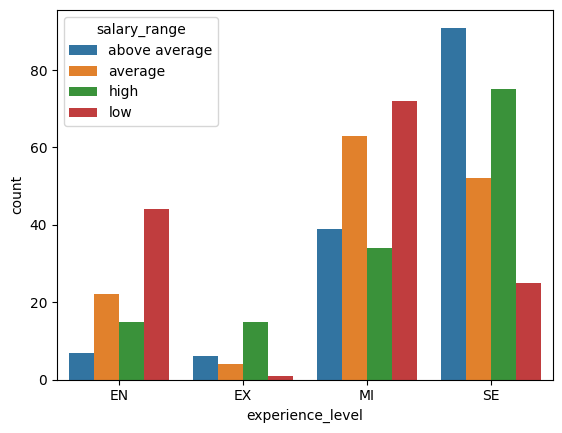

In [ ]:
sns.barplot(x = level_salary['experience_level'], y = level_salary['count'], hue = level_salary['salary_range'])

Junior-специалисты чаще получают низкую зарплату, работники executive-level — высокую, middle-специалисты — низкую, senior-специалисты — выше среднего. При этом высокую зарплату также чаще платят специалистам senior-level, а работники middle-уровня так же часто, как сеньоры, могут рассчитывать на среднюю зарплату.


Ранее я предполагала, что показатель зарплаты до 50 тысяч долларов в год — это низкая зарплата, и приписала ее junior-специалистам. Проверю.

In [ ]:
#определить позицию первого квартиля. Все, что ниже этого показателя — низкая зарплата
data.salary.quantile(0.25)

67000.0

Действительно, 50 тысяч долларов входит в диапазон до 1 квартиля, который я определила как "low".

Однако низкий уровень зарплат не только у junior-специалистов, но и у middle-специалистов. Значит, обе этих категории влияют на распределение зарплат до среднего значения.

In [ ]:
#взаимосвязь опыта и размера компании
level_size = data.groupby(['company_size', 'experience_level'], as_index = False).agg({'work_year':'count'}).rename(columns={'work_year':'count'})
level_size.head()

,company_size,experience_level,count
0,L,EN,29
1,L,EX,11
2,L,MI,84
3,L,SE,69
4,M,EN,30


Я получила таблицу, сгруппированную по размеру компании и опыту работников. Посмотрю на графике, как распределяются эти данные.

<Axes: xlabel='experience_level', ylabel='count'>

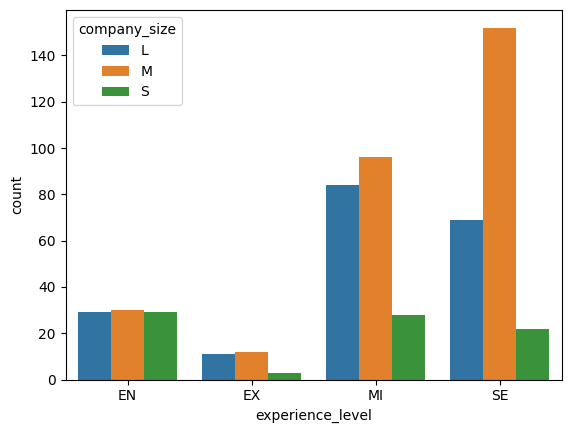

In [ ]:
sns.barplot(x = level_size['experience_level'], y = level_size['count'], hue = level_size['company_size'])

В маленьких компаниях действительно не так много специалистов в целом. Однако работников начального уровня везде почти одинаковое количество. В среднего размера компаниях оказалось больше senior-специалистов и даже middle-специалистов.

Значит, размер компании вовсе не гарантирует, что в ней работает больше опытных специалистов.

In [ ]:
#отношение опыта работников к типу занятости
type_level = data.groupby(['employment_type', 'experience_level'], as_index = False).agg({'work_year':'count'}).rename(columns={'work_year':'count'})
type_level.head()

,employment_type,experience_level,count
0,CT,EN,2
1,CT,EX,1
2,CT,MI,1
3,CT,SE,1
4,FL,MI,3


<Axes: xlabel='experience_level', ylabel='count'>

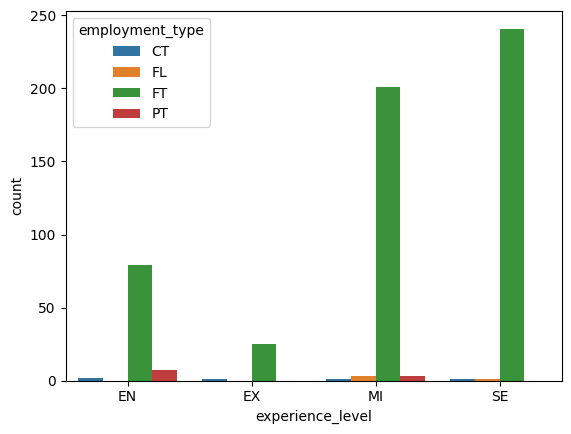

In [ ]:
sns.barplot(x = type_level['experience_level'], y = type_level['count'], hue = type_level['employment_type'])

У всех работников преобладает тип занятости fulltime. Частичная занятость наблюдается у junior-специалистов (это маленький процент, но в сравнении с другими уровнями он заметный).

####Вывод:

наиболее популярные профессии — Data Analyst, Data Engineer и Data Scientist. Джунам и мидлам лучше идти в компании среднего размера, а вот сеньорам можно идти в крупные организации. Размер компании все равно не гарантирует преобладание в ней опытных специалистов.

###2.2. Исследование зарплаты по отношению к другим данным.

Рассмотрю взаимосвязь зарплат с годом работы, размером компании, должностью, долей удаленой работы и страной резиденства работников.

In [ ]:
#отношение размера зарплат к году работы
salary_year = data.groupby(['salary_range', 'work_year'], as_index=False).agg({'job_title':'count'}).rename(columns={'job_title':'count'})
salary_year.head()

,salary_range,work_year,count
0,above average,2020,11
1,above average,2021,39
2,above average,2022,93
3,average,2020,18
4,average,2021,56


<Axes: xlabel='salary_range', ylabel='count'>

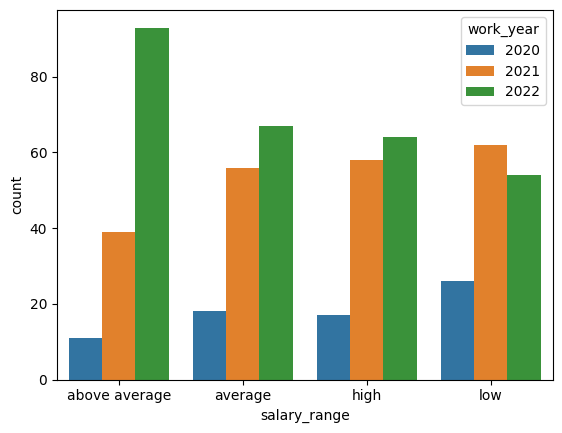

In [ ]:
sns.barplot(x = salary_year['salary_range'], y = salary_year['count'], hue = salary_year['work_year'])

В 2020 году зафиксировано больше низких зарплат, чем в другие годы, и меньше зарплат в диапазоне "выше среднего".

В 2021 году зафиксировано больше низких зарплат, и снова меньше всего "выше среднего".

В 2022 году зафиксировано больше зарплат "выше среднего", а меньше всего — низких.

In [ ]:
#отношение зарплаты к размеру компании
salary_size = data.groupby(['salary_range', 'company_size'], as_index = False).agg({'work_year':'count'}).rename(columns = {'work_year':'count'})
salary_size.head()

,salary_range,company_size,count
0,above average,L,46
1,above average,M,86
2,above average,S,11
3,average,L,42
4,average,M,80


<Axes: xlabel='salary_range', ylabel='count'>

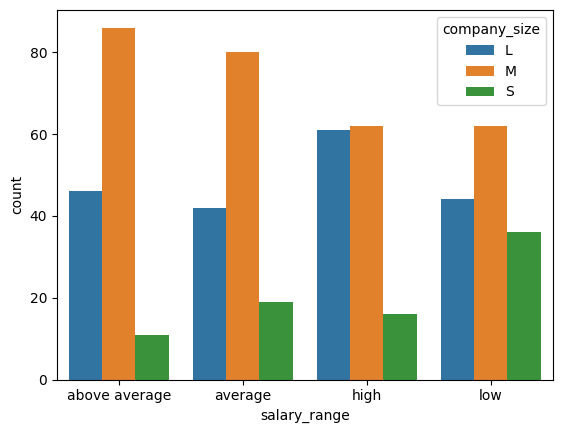

In [ ]:
sns.barplot(x = salary_size['salary_range'], y = salary_size['count'], hue = salary_size['company_size'])

В маленьких компаниях чаще платят низкую зарплату.

В компаниях среднего размера — зарплату выше среднего.

В больших компаниях чаще платят высокую зарплату.

In [ ]:
#отношение зарплаты к должности работников
salary_job = data.groupby(['salary_range', 'job_title'], as_index = False).agg({'work_year':'count'}).rename(columns={'work_year':'count'}).sort_values(by='count', ascending=False)
salary_job.head()

,salary_range,job_title,count
16,above average,data scientist,36
99,low,data engineer,34
103,low,data scientist,32
37,average,data engineer,32
40,average,data scientist,31


<Axes: xlabel='job_title', ylabel='count'>

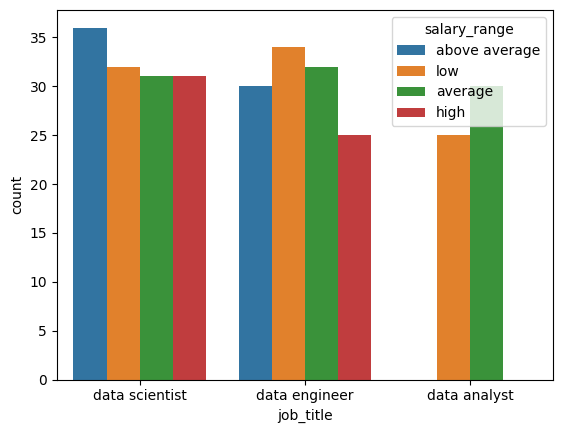

In [ ]:
sns.barplot(x = salary_job['job_title'].head(10), y = salary_job['count'], hue = salary_job['salary_range'])

Три наиболее популярные профессии — Data Scientist, Data Analyst и Data Engineer.

Data Scientist чаще получает зарплату выше среднего, Data Analyst — среднюю, а Data Engineer низкую.

In [ ]:
salary_remote = data.groupby(['salary_range', 'remote_ratio'], as_index = False).agg({'work_year':'count'}).rename(columns={'work_year':'count'})
salary_remote.head()

,salary_range,remote_ratio,count
0,above average,0,29
1,above average,50,16
2,above average,100,98
3,average,0,35
4,average,50,20


<Axes: xlabel='salary_range', ylabel='count'>

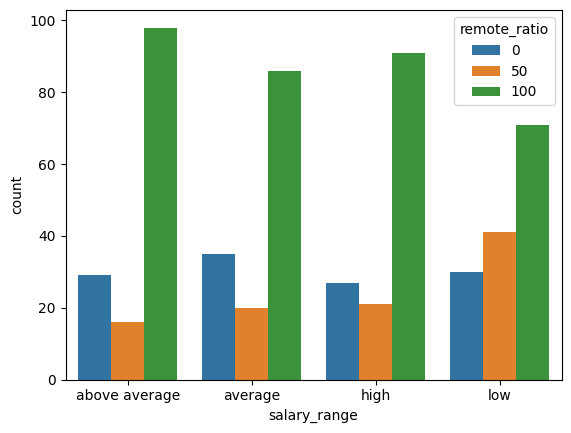

In [ ]:
sns.barplot(x = salary_remote['salary_range'], y = salary_remote['count'], hue = salary_remote['remote_ratio'])

Работники со всеми уровнями зарплаты чаще работают удаленно. При этом у специалистов с низкой зарплатой чаще встречается вариант частично удаленной работы.

In [ ]:
#отношение зарплаты к стране резидентства работника
salary_country = data.groupby(['salary_range', 'employee_residence'], as_index = False).agg({'work_year':'count'}).rename(columns={'work_year':'count'}).sort_values(by='count', ascending=False)
salary_country.head()

,salary_range,employee_residence,count
14,above average,US,116
49,high,US,91
36,average,US,76
42,high,IN,28
60,low,GB,24


<Axes: xlabel='employee_residence', ylabel='count'>

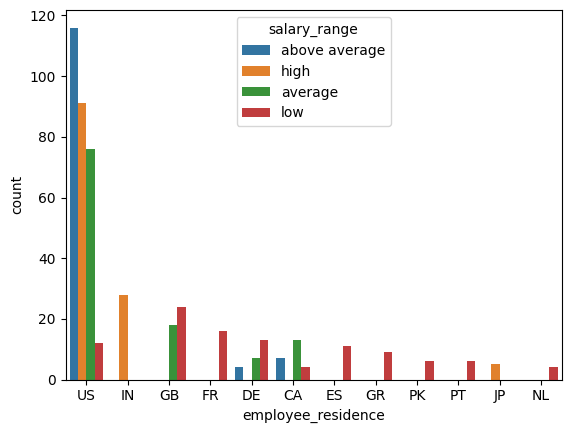

In [ ]:
sns.barplot(x = salary_country['employee_residence'].head(20), y = salary_country['count'], hue = salary_country['salary_range'])

Для первых 20 записей в таблице получается 12 стран. В США самые высокие зарплаты, при этом чаще всего работники из этой страны получают зарплату выше среднего. Резидентов с низкими зарплатами в США меньше, чем, например, в Великобритании, но больше, чем в Канаде.

In [ ]:
#средняя зарплата для каждой страны, в которой находится компания
mean_salary_company_location = data.groupby('company_location', as_index = False).agg({'salary_in_usd':'mean'}).rename(columns={'salary_in_usd':'mean_salary'}).sort_values(by='mean_salary', ascending=False)
mean_salary_company_location.head()

,company_location,mean_salary
43,RU,157500.000000
48,US,144292.993711
38,NZ,125000.000000
24,IL,119059.000000
29,JP,114127.333333


Средняя зарплата в компаниях, зарегистрированных в России, больше, чем у конкурентов из США, Новой Зеландии, Израиля и Японии.

In [ ]:
mean_salary_company_location.tail()

,company_location,mean_salary
47,UA,13400.000000
39,PK,13333.333333
30,KE,9272.000000
27,IR,4000.000000
49,VN,4000.000000


Меньше всего предлагают работникам компании, зарегистрированные во Вьетнаме.

####Вывод:

в наиболее выгодной позиции оказываются работники российских компаний на позиции Data Scientist, работающие удаленно и с полной занятостью в компаниях среднего размера.